# Victor Flores A
# Juan Andres Paez

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [32]:
df=pd.read_csv("Dummy Data HSS.csv")
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [33]:
df.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [34]:
df=df.dropna()

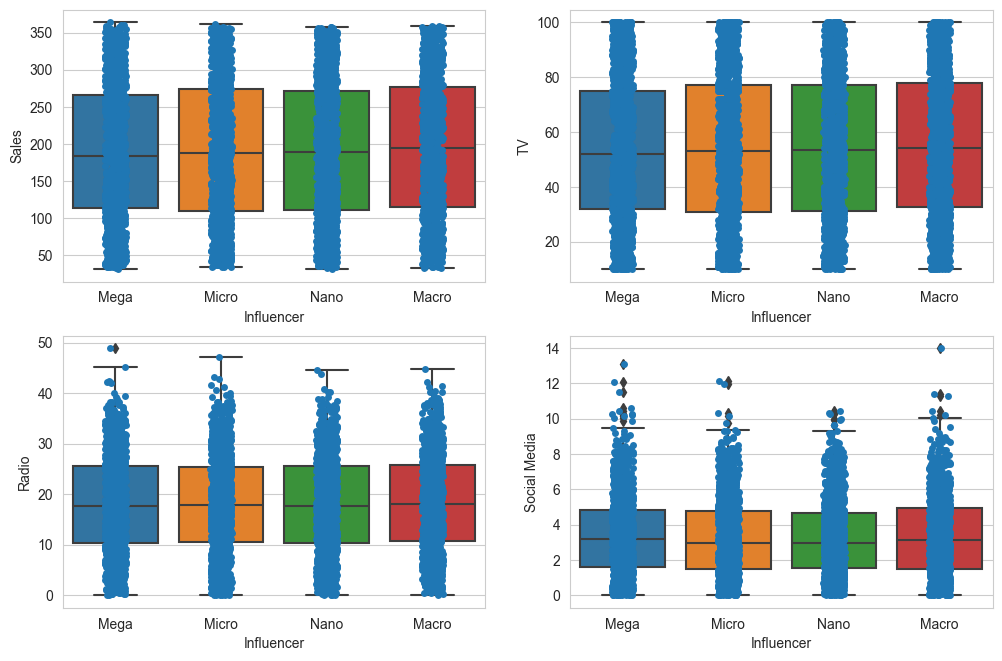

In [35]:
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')

plt.subplot(3,2,1)
ax= sns.boxplot(x='Influencer',y='Sales',data=df)
ax = sns.stripplot(x='Influencer',y='Sales',data=df)

plt.subplot(3,2,2) 
ax= sns.boxplot(x='Influencer',y='TV',data=df)
ax = sns.stripplot(x='Influencer',y='TV',data=df)

plt.subplot(3,2,3) 
ax= sns.boxplot(x='Influencer',y='Radio',data=df)
ax = sns.stripplot(x='Influencer',y='Radio',data=df)

plt.subplot(3,2,4) 
ax= sns.boxplot(x='Influencer',y='Social Media',data=df)
ax = sns.stripplot(x='Influencer',y='Social Media',data=df)


In [36]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df.Radio.quantile(0.25)
Q3 = df.Radio.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)


15.085248102500003


- De acuerdo a lo observado en los diagramas de cajas, podemos identificar datos que salen de los cuartiles y que identificaremos como atipicos dentro de las variables numericas Radio y Social Media que representan el presupuesto de cada influencer en millones

In [37]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df.Radio.quantile(0.25)
Q3 = df.Radio.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['Radio'] < (Q1 - 1.5 * IQR)) |(df['Radio'] > (Q3 + 1.5 * IQR)))]
df.shape

15.085248102500003


(4545, 5)

In [38]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df['Social Media'].quantile(0.25)
Q3 = df['Social Media'].quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['Social Media'] < (Q1 - 1.5 * IQR)) |(df['Social Media'] > (Q3 + 1.5 * IQR)))]
df.shape

3.2732564039999996


(4517, 5)

# PARTE 1

### 1. Inicializar el modelo

In [39]:
from sklearn.linear_model import LinearRegression

#### Recodificamos las variables categóricas con Label Encoder

In [40]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [41]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

In [42]:
df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)

Separamos a los predictores de nuestra variable objetivo que sera sales:

In [44]:
X = df[df.columns.difference(['Sales'])]
y = df.Sales

Como nuestra base de datos no contine la variable tiempo, podemos realizar un train/split aleatorio de la siguiente forma:

In [45]:
from sklearn.model_selection import train_test_split

Dividimos en dos partes a nuestra base de datos en un 90% para que el algoritmo entrene y un 10% para aplicar nuestras métricas de desempeño.

In [46]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.10,random_state =123)

In [47]:
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(4065, 4)  <class 'pandas.core.frame.DataFrame'>
(4065,) 	  <class 'pandas.core.series.Series'>
(452, 4)  <class 'pandas.core.frame.DataFrame'>
(452,) 	  <class 'pandas.core.series.Series'>


# Modelo de Regresión Lineal por Sklearn

In [48]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

### Realizar las predicciones

In [49]:
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

## Métricas de evaluación

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### MSE

In [51]:
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)
print(MSE_test)

8.76805103371649
8.167111629585127


#### RMSE

In [52]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

2.961089501132394
2.8578158844798116


#### MAE

In [53]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)
print(MAE_test)

2.370318400409788
2.328157709222865


#### R^2

In [54]:
from sklearn.metrics import r2_score
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train)
print('El R^2 del subconjunto de prueba es:' , r_square_test)

El R^2 del subconjunto de entrenamiento es: 0.9989827074141471
El R^2 del subconjunto de prueba es: 0.9990527582048809


El coeficiente determina la calidad del modelo para replicar los resultados. Mide la proporción de la variabilidad total observada en la respuesta que es explicada por la asociación lineal, el valor obtenido tanto para los datos de entrenamiento como para los de prueba es cercano a 1

In [55]:
# Print the Intercept:
print('intercepto:', modelo_regresion.intercept_)

# Print the Slope:
print('pendiente:', modelo_regresion.coef_) 

intercepto: -0.1304721995020941
pendiente: [-2.07175872e-02 -4.74292089e-03 -2.67635799e-03  3.56350257e+00]


#### Predicciones en el subgrupo de datos de entrenamiento

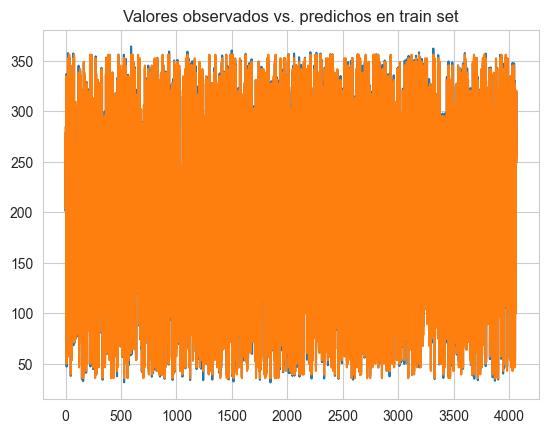

In [56]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

#### Predicciones en el subgrupo de datos de entrenamiento

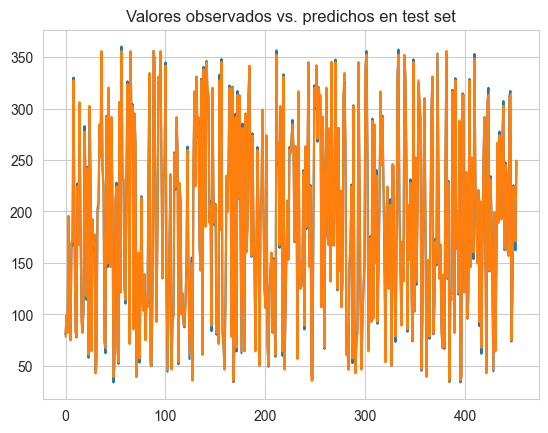

In [57]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test)
plt.title("Valores observados vs. predichos en test set");

Como se puede observar en los graficos, existe una desviacion muy pequena entre los valores observador y los valores predichos tanto para datos de entrenamiento como para datos de prueba

# Feature importance

### Normalizar variables

In [59]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Entrenar el modelo con los datos de entrenamiento

In [60]:
modelo_regresion_std = LinearRegression()
modelo_regresion_std.fit(X_train_std, y_train)

LinearRegression()

### Realizar las predicciones

In [61]:
predicciones_train_std = modelo_regresion_std.predict(X_train_std)
predicciones_test_std = modelo_regresion_std.predict(X_test_std)

#### R^2

In [62]:
r_square_train_std = r2_score(y_train, predicciones_train_std)
r_square_test_std  = r2_score(y_test, predicciones_test_std)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train_std)
print('El R^2 del subconjunto de prueba es:' , r_square_test_std)

El R^2 del subconjunto de entrenamiento es: 0.9989827074141471
El R^2 del subconjunto de prueba es: 0.9990527582048809


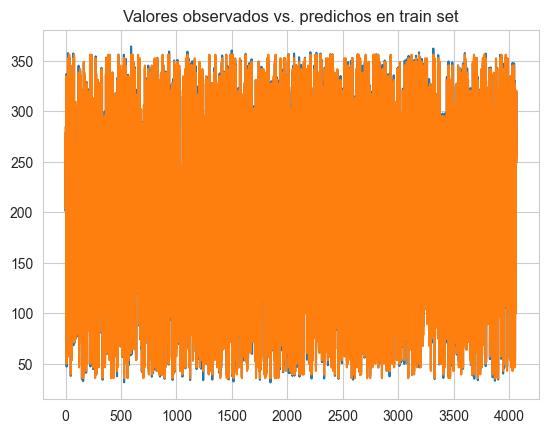

In [63]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train_std)
plt.title("Valores observados vs. predichos en train set");

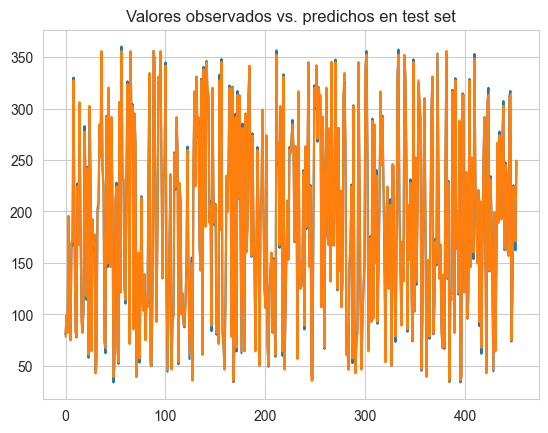

In [64]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test_std)
plt.title("Valores observados vs. predichos en test set");

### Extraer los coeficientes

In [65]:
importancia = modelo_regresion_std.coef_

# Resumen
for i,v in enumerate(importancia):
    print('Variable explicativa No. %0d, Score: %.5f' % (i,v))

Variable explicativa No. 0, Score: -0.02302
Variable explicativa No. 1, Score: -0.04555
Variable explicativa No. 2, Score: -0.00572
Variable explicativa No. 3, Score: 92.83368


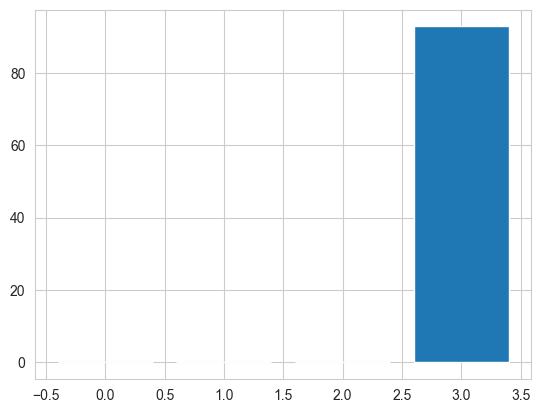

In [66]:
# Graficar la importancia o "feature importance"
plt.bar([x for x in range(len(importancia))], importancia)
plt.show()

In [67]:
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,1,54.732757
1,13.0,9.237765,2.409567,1,46.677897
2,41.0,15.886446,2.913410,1,150.177829
3,83.0,30.020028,6.922304,1,298.246340
4,15.0,8.437408,1.405998,2,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,2,94.685866
4568,71.0,20.610685,6.545573,3,249.101915
4569,44.0,19.800072,5.096192,2,163.631457
4570,71.0,17.534640,1.940873,0,253.610411


### De acuerdo a lo evidenciado, la variable independiente 3 es la mas significativa, la cual corresponde a Influencer

# PARTE 2

# El Modelo de Regresión Logística por Sklearn

In [5]:
df=pd.read_csv("bank-additional-full.csv", sep = ';')

In [6]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Recodificamos las variables categóricas con Label Encoder

In [87]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

# creating instance of labelencoder
labelencoder = LabelEncoder()

df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)

Una vez tenemos nuestros diferentes conjuntos de datos, procedemos a re-extraer nuestras variables explicativas y variable objetivo.

In [88]:
X_logit = df[df.columns.difference(['y'])]
y_logit = df.y

Dividimos en dos partes a nuestra base de datos en un 90% para que el algoritmo entrene y un 10% para aplicar nuestras métricas de desempeño.

In [90]:
X_train_logit , X_test_logit , y_train_logit , y_test_logit = train_test_split(X_logit , y_logit , test_size = 0.10,random_state =123)

In [91]:
print(X_train_logit.shape,"",type(X_train_logit))
print(X_train_logit.shape,"\t ",type(y_train_logit))
print(X_test_logit.shape,"",type(X_test_logit))
print(X_test_logit.shape,"\t ",type(y_test_logit))

(37069, 20)  <class 'pandas.core.frame.DataFrame'>
(37069, 20) 	  <class 'pandas.core.series.Series'>
(4119, 20)  <class 'pandas.core.frame.DataFrame'>
(4119, 20) 	  <class 'pandas.core.series.Series'>


### Entrenar el modelo con los datos de entrenamiento

In [93]:
from sklearn.linear_model import LogisticRegression

modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_train_logit, y_train_logit)

LogisticRegression()

### Realizar las predicciones

In [95]:
predicciones_train_logit = modelo_logistico.predict(X_train_logit)
predicciones_test_logit  = modelo_logistico.predict(X_test_logit)

### Métricas de evaluación

#### Matriz de confusión

In [96]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score

In [97]:
cm = metrics.confusion_matrix(y_test_logit, predicciones_test_logit)
print(cm)

[[3592   79]
 [ 276  172]]


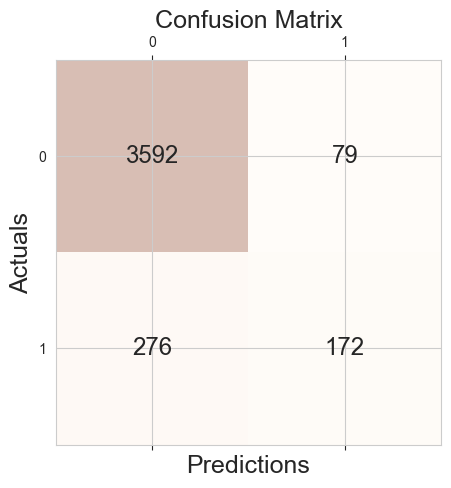

In [98]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

A partir de los resultados, observamos que el modelo es capaz de clasificar correctamente 3592+172/(3592+79+276+172)=0.9138(91%) de las observaciones de prueba 

#### Precisión o "precision"

In [99]:
print('Precision: %.3f' % precision_score(y_test_logit, predicciones_test_logit))

Precision: 0.685


El modelo tiene una precision del 68%

#### Exhaustividad o "recall"

In [100]:
print('Recall: %.3f' % recall_score(y_test_logit, predicciones_test_logit))

Recall: 0.384


#### F1 score

In [101]:
print('F1 Score: %.3f' % f1_score(y_test_logit, predicciones_test_logit))

F1 Score: 0.492


# Feature importance

In [103]:
sc_logit = StandardScaler()

X_train_std_logit = sc_logit.fit_transform(X_train_logit)
X_test_std_logit = sc_logit.transform(X_test_logit)

In [104]:
modelo_logistico_std = LogisticRegression()
modelo_logistico_std.fit(X_train_std_logit, y_train_logit)

LogisticRegression()

In [105]:
predicciones_train_logit_std = modelo_logistico_std.predict(X_train_std_logit)
predicciones_test_logit_std  = modelo_logistico_std.predict(X_test_std_logit)

In [106]:
importancia_logit = modelo_logistico_std.coef_[0]

In [107]:
# Resumen
for i,v in enumerate(importancia_logit):
    print('Variable explicativa No. %0d, Score: %.5f' % (i,v))

Variable explicativa No. 0, Score: 0.05797
Variable explicativa No. 1, Score: -0.08466
Variable explicativa No. 2, Score: 0.11919
Variable explicativa No. 3, Score: 0.48147
Variable explicativa No. 4, Score: -0.32747
Variable explicativa No. 5, Score: 0.07930
Variable explicativa No. 6, Score: -0.15473
Variable explicativa No. 7, Score: 1.17450
Variable explicativa No. 8, Score: 0.11087
Variable explicativa No. 9, Score: -1.48018
Variable explicativa No. 10, Score: 0.97317
Variable explicativa No. 11, Score: -0.00121
Variable explicativa No. 12, Score: 0.03639
Variable explicativa No. 13, Score: -0.02025
Variable explicativa No. 14, Score: 0.07601
Variable explicativa No. 15, Score: -0.24897
Variable explicativa No. 16, Score: -0.81194
Variable explicativa No. 17, Score: -0.18870
Variable explicativa No. 18, Score: 0.16530
Variable explicativa No. 19, Score: -0.02531


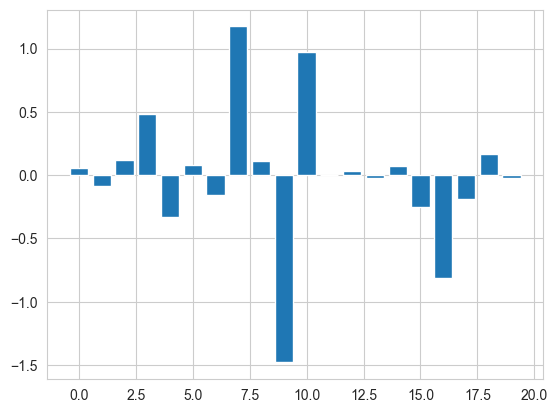

In [108]:
# Graficar la importancia o "feature importance"
plt.bar([x for x in range(len(importancia_logit))], importancia_logit)
plt.show()

La variable mas significa es la numero 7 que corresponde a si el cliente fue contactado o no )contact)